# **[라이브러리/데이터 불러오기]**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/kubig_ML"

df_train = pd.read_csv(PATH+"/train.csv")
df_test = pd.read_csv(PATH+"/test.csv")

# **[데이터 살펴보기(EDA)]**

In [ ]:
print(df_train.shape)
print(df_train.info())
df_train.head()

(26457, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

In [ ]:
print(df_test.shape)
print(df_test.info())
df_test.head()

(10000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64


index gender car reality  child_num  income_total           income_type  \
0  26457      M   Y       N          0      112500.0             Pensioner   
1  26458      F   N       Y          0      135000.0         State servant   
2  26459      F   N       Y          0       69372.0               Working   
3  26460      M   Y       N          0      112500.0  Commercial associate   
4  26461      F   Y       Y          0      225000.0         State servant   

                        edu_type     family_type         house_type  \
0  Secondary / secondary special  Civil marriage  House / apartment   
1               Higher education         Married  House / apartment   
2  Secondary / secondary special         Married  House / apartment   
3  Secondary / secondary special         Married  House / apartment   
4               Higher education         Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -21990         365243           1           0      1      0   
1      -18964          -8671           1           0      1      0   
2      -15887           -217           1           1      1      0   
3      -19270          -2531           1           1      0      0   
4      -17822          -9385           1           1      0      0   

   occyp_type  family_size  begin_month  
0         NaN          2.0        -60.0  
1  Core staff          2.0        -36.0  
2    Laborers          2.0        -40.0  
3     Drivers          2.0        -41.0  
4    Managers          2.0         -8.0

In [ ]:
print(df_train['FLAG_MOBIL'].unique())
print(df_test['FLAG_MOBIL'].unique())

[1]
[1]


train, test 데이터 모두 값이 1로 동일함으로 전처리시 'FLAG_MOBIL'은 삭제

In [ ]:
# 상관계수 분석
df_train.drop(["index","FLAG_MOBIL","work_phone","phone","email"],axis=1).corr()["credit"]

child_num        0.004081
income_total     0.008555
DAYS_BIRTH      -0.025187
DAYS_EMPLOYED   -0.003798
family_size      0.008227
begin_month     -0.147477
credit           1.000000
Name: credit, dtype: float64

credit과 뚜렷한 상관관계를 보이는 변수는 없다.

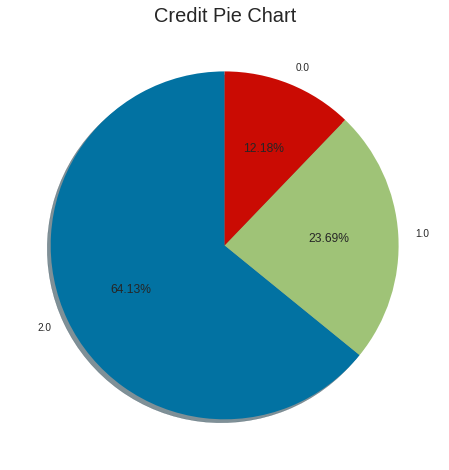

In [ ]:
plt.subplots(figsize = (8,8))
plt.pie(df_train['credit'].value_counts(), labels = df_train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Credit Pie Chart', size=20)
plt.show()

낮을수록 높은 신용의 신용카드 사용자를 뜻한다. \
따라서 낮은 신용의 신용카드 사용자가 많다는 것을 알 수 있다.

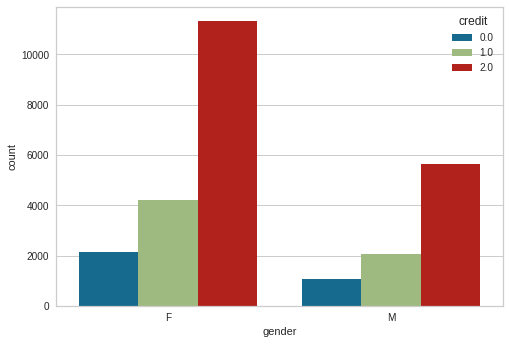

In [ ]:
# 성별
sns.countplot('gender',hue='credit',data=df_train)

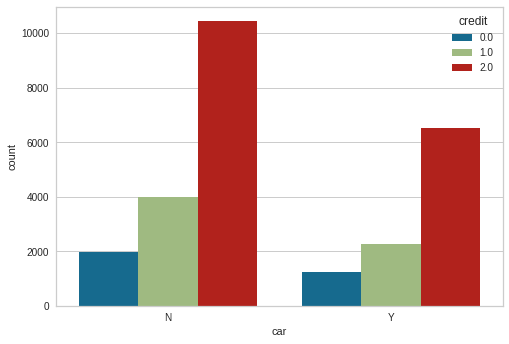

In [ ]:
# 차량소유여부
sns.countplot('car',hue='credit',data=df_train)

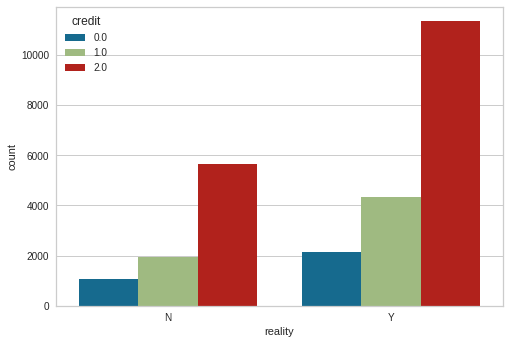

In [ ]:
# 부동산 소유여부
sns.countplot('reality',hue='credit',data=df_train)

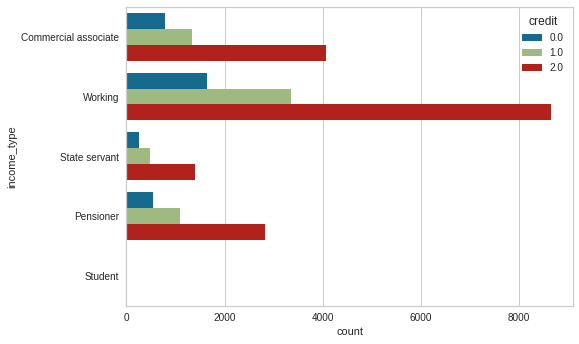

In [ ]:
# 소득 분류
sns.countplot(y='income_type',hue='credit',data=df_train)

Pensioner는 연금 수령자며, 나머지는 대부분 노동자임을 알 수 있다.

In [ ]:
print(df_train['income_type'].value_counts())
print(df_test['income_type'].value_counts())

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64
Working                 5174
Commercial associate    2288
Pensioner               1703
State servant            831
Student                    4
Name: income_type, dtype: int64


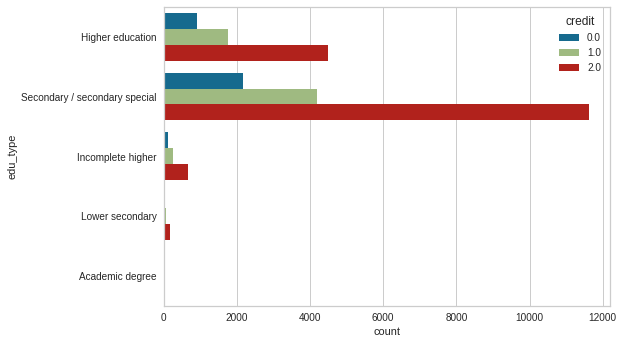

In [ ]:
# 교육 수준
sns.countplot(y='edu_type',hue='credit',data=df_train)

In [ ]:
print(df_train['edu_type'].value_counts())
print(df_test['edu_type'].value_counts())

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64
Secondary / secondary special    6782
Higher education                 2702
Incomplete higher                 390
Lower secondary                   117
Academic degree                     9
Name: edu_type, dtype: int64


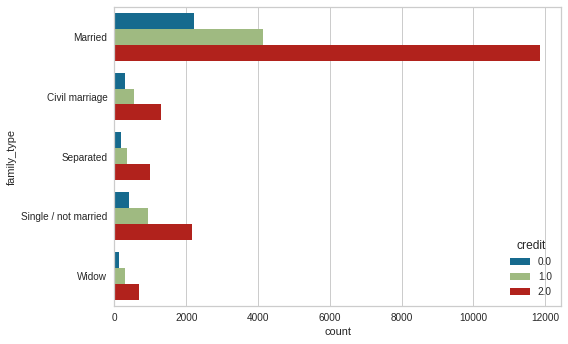

In [ ]:
# 결혼 여부
sns.countplot(y='family_type',hue='credit',data=df_train)

결혼 상태에따라 신용도가 달라짐을 볼 수 있습니다. 유의미한 변수입니다.

In [ ]:
# occyp_type
print(df_train['occyp_type'].value_counts())
print(df_test['occyp_type'].value_counts())

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64
Laborers                 1699
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
Medicine staff            343
High skill tech staff     343
Accountants               339
Cooking staff             198
Security staff            168
Cleaning staff            148
Private service staff     101
Secretaries                54
Waiters/barmen staff       50
Low-skill

In [ ]:
# child_num
print(df_train['child_num'].value_counts())
print(df_test['child_num'].value_counts())

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64
0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64


자녀수가 5명 초과시 이상치로 봐도 무방

In [ ]:
# family_size
print(df_train['family_size'].value_counts())
print(df_test['family_size'].value_counts())

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64
2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64


자녀수가 7명 초과시 이상치로 봐도 무방

In [ ]:
# family_size - child_num
print('train', (df_train['family_size'] - df_train['child_num']).unique())
print('test', (df_test['family_size'] - df_test['child_num']).unique())

train [ 2.  1.  0. -1.]
test [ 2.  1. -1.  0.]


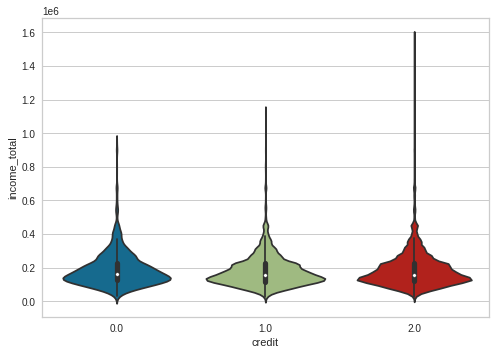

In [ ]:
# 총 소득
sns.violinplot('credit','income_total',data=df_train,split=True)

# **[데이터 전처리]**

**(주의) train data에 해준 그대로 test data 전처리!!!**

## **1. 불필요 변수 제거**

FLAG_MOBIL은 모두 1이므로 모델링에 별로 유의미한 정보가 아니기에 제거. \
index 번호도 제거.

In [ ]:
df_train.drop(['index','FLAG_MOBIL'],inplace=True,axis=1)
df_test.drop(['index','FLAG_MOBIL'],inplace=True,axis=1)

## **2. 수치형 데이터 전처리**

"DAYS_EMPLOYED"에서 양수는 무직자를 뜻하므로 0으로 대체한다.

In [ ]:
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

"begin_month", "DAYS_BIRTH", "DAYS_EMPLOYED" 변수에서 음수를 양수로 변환.

In [ ]:
# DAYS_BIRTH 모두 양수로 변환
df_train['DAYS_BIRTH'] = np.abs(df_train['DAYS_BIRTH'])
df_test['DAYS_BIRTH'] = np.abs(df_test['DAYS_BIRTH'])

# DAYS_EMPLOYED 모두 양수로 변환
df_train['DAYS_EMPLOYED'] = np.abs(df_train['DAYS_EMPLOYED'])
df_test['DAYS_EMPLOYED'] = np.abs(df_test['DAYS_EMPLOYED'])

# begin_month 모두 양수로 변환
df_train['begin_month'] = np.abs(df_train['begin_month'])
df_test['begin_month'] = np.abs(df_test['begin_month'])

나이 데이터 파생변수 추가 (년, 월, 주)

In [ ]:
# 산 나이 (년, 월, 주) 각각 age_y, age_m, age_w 추가
df_train['age_y'] = df_train['DAYS_BIRTH'] // 365
df_test['age_y'] = df_test['DAYS_BIRTH'] // 365
df_train['age_m'] = df_train['DAYS_BIRTH'] % 365 // 30
df_test['age_m'] = df_test['DAYS_BIRTH'] % 365 // 30
df_train['age_w'] = df_train['DAYS_BIRTH'] % 365 % 30 // 7
df_test['age_w'] = df_test['DAYS_BIRTH'] % 365 % 30 // 7

근속 기간 (년,월,주) 파생변수 추가


In [ ]:
# 일한 기간 (년, 월, 주) 각각 working_y, working_m, working_w 추가
df_train['working_y'] = df_train['DAYS_EMPLOYED'] // 365
df_test['working_y'] = df_test['DAYS_EMPLOYED'] // 365
df_train['working_m'] = df_train['DAYS_EMPLOYED'] % 365 // 30
df_test['working_m'] = df_test['DAYS_EMPLOYED'] % 365 // 30
df_train['working_w'] = df_train['DAYS_EMPLOYED'] % 365 % 30 // 7
df_test['working_w'] = df_test['DAYS_EMPLOYED'] % 365 % 30 // 7

## **3. 결측치 처리** 

In [ ]:
df_train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
age_y               0
age_m               0
age_w               0
working_y           0
working_m           0
working_w           0
dtype: int64

In [ ]:
df_test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
age_y               0
age_m               0
age_w               0
working_y           0
working_m           0
working_w           0
dtype: int64

결측치는 "occyp_type" 변수만 포함되어 있습니다

In [ ]:
# null을 모두 결측치(missing)으로 표기기
df_train.fillna("missing",inplace=True)
df_test.fillna("missing",inplace=True)

DAYS_EMPLOYED가 0이고 occyp_type이 None이면 무직자라고 판단. \
DAYS_EMPLOYED가 0이 아니고 occyp_type이 None이면 결측치라고 판단.

In [ ]:
# DAYS_EMPLOYED == 0 && occyp_type == None은 무직자
df_train.loc[((df_train['DAYS_EMPLOYED']== 0) & (df_train['occyp_type'] == "missing")),'occyp_type'] = 'No_Job'
df_test.loc[((df_test['DAYS_EMPLOYED']== 0) & (df_test['occyp_type'] == "missing")),'occyp_type'] = 'No_Job'

Laborers                 4512
No_Job                   4438
missing                  3733
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64


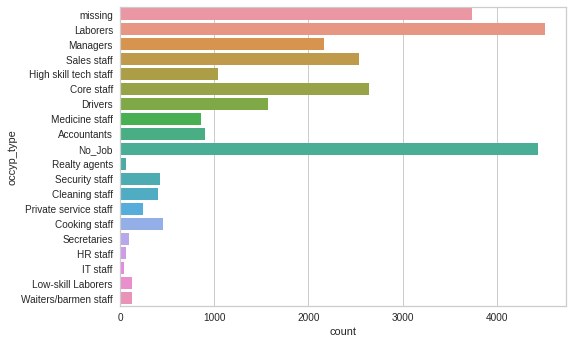

In [ ]:
print(df_train["occyp_type"].value_counts())
sns.countplot(y="occyp_type",data=df_train)

무직자가 상당히 많음을 알 수 있습니다.

In [ ]:
# 확인용
print(df_train.isna().sum())
print(df_test.isna().sum())

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age_y            0
age_m            0
age_w            0
working_y        0
working_m        0
working_w        0
dtype: int64
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
age_y            0
age_m            0
age_w            0
working_y        0
working_m        0
working_w        0
dtype: int64


## **4. Binary Variable Encoding**

"gender", "car", "reality" 변수의 encoding 형태를 1/0으로 변형해줍니다.

In [ ]:
df_train['gender'] = df_train['gender'].replace(['F','M'],[0,1])
df_test['gender'] = df_test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(df_train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
df_train['car'] = df_train['car'].replace(['N','Y'],[0,1])
df_test['car'] = df_test['car'].replace(['N','Y'],[0,1])
print(df_train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
df_train['reality'] = df_train['reality'].replace(['N','Y'],[0,1])
df_test['reality'] = df_test['reality'].replace(['N','Y'],[0,1])
print(df_train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(df_train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(df_train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(df_train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


In [ ]:
# 통신 정보를 통합한 communication 변수 생성 
# phone, work_phone, email 변수 삭제제
df_train['communication']=0
df_test['communication']=0
for col in ['phone','work_phone','email']:
    df_train['communication']+=df_train[col]
    df_train=df_train.drop(col,axis=1)
for col in ['phone','work_phone','email']:
    df_test['communication']+=df_test[col]
    df_test=df_test.drop(col,axis=1)

## **5. Multicategory Variable Encoding**

In [ ]:
multi_col = ['income_type','edu_type','family_type','house_type','occyp_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in multi_col:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])

## **6. Numerical Variables**

###Encoding 이후 불필요 변수 삭제

In [ ]:
df_train.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],inplace=True,axis=1)
df_test.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],inplace=True,axis=1)

###family_size 변수 -> 이상치 처리

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64


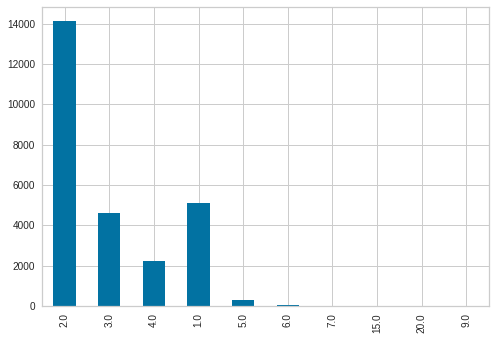

In [ ]:
print(df_train['family_size'].value_counts())
df_train['family_size'].value_counts(sort=False).plot.bar()

2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64


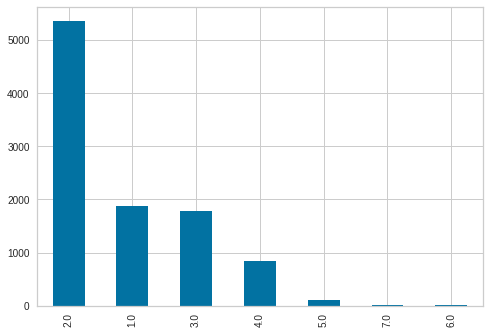

In [ ]:
print(df_test['family_size'].value_counts())
df_test['family_size'].value_counts(sort=False).plot.bar()

In [ ]:
# 부양 가족수가 7명 초과면 제거
df_train = df_train[(df_train['family_size'] <= 7)]

###child_num 변수 -> 삭제

In [ ]:
print(df_train['family_size'].corr(df_train['child_num']))

0.8861354475336642


child_num은 family_size와 상관관계가 높은 것이 확인된다. 다중공산성이 의심됨으로 child_num변수도 삭제해준다.

In [ ]:
df_train.drop(["child_num"],axis=1,inplace=True)
df_test.drop(["child_num"],axis=1,inplace=True)

###income_total 변수 -> 로그 변환

(array([1.6209e+04, 8.3270e+03, 1.5300e+03, 2.0600e+02, 1.2100e+02,
        4.4000e+01, 3.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <a list of 10 Patch objects>)

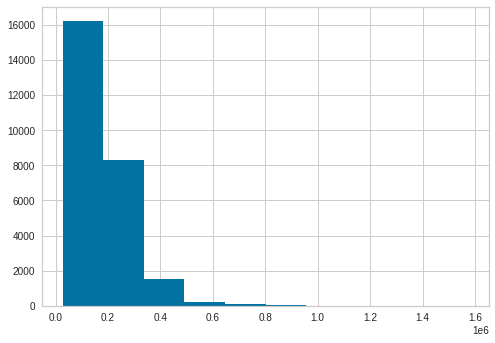

In [ ]:
plt.hist(df_train["income_total"],bins=10)

income_total 변수의 경우 분포가 right-skewed 되어 있음을 확인할 수 있다. 따라서 로그 변환을 해주는 것이 적절할 것이다.

In [ ]:
# log transformation
for df in [df_train,df_test]:
    df['income_total'] = np.log1p(1+df['income_total'])

(array([  84.,  341., 2788., 7264., 7714., 5502., 2362.,  308.,   77.,
          11.]),
 array([10.20366622, 10.6102763 , 11.01688639, 11.42349648, 11.83010657,
        12.23671666, 12.64332675, 13.04993683, 13.45654692, 13.86315701,
        14.2697671 ]),
 <a list of 10 Patch objects>)

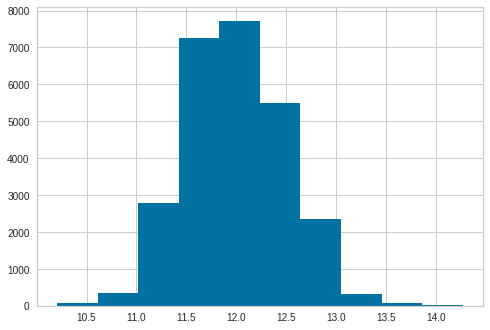

In [ ]:
#변경된 히스토그램
plt.hist(df_train["income_total"],bins=10)

###Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans_train = df_train.drop(['credit'], axis=1)
kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
df_train['cluster'] = kmeans.predict(kmeans_train)
df_test['cluster'] = kmeans.predict(df_test)

###정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_feats = ['income_total','family_size','begin_month','age_y','age_m','age_w','working_y','working_m','working_w']
numerical_feats.remove('income_total')
scaler = StandardScaler()
df_train[numerical_feats] = scaler.fit_transform(df_train[numerical_feats])
df_test[numerical_feats] = scaler.transform(df_test[numerical_feats])

In [ ]:
df_train.head()

gender  car  reality  income_total  income_type  edu_type  family_type  \
0       0    0        0     12.218505            0         1            1   
1       0    0        1     12.419174            0         4            0   
2       1    1        1     13.017007            4         1            1   
3       0    0        1     12.218505            0         4            1   
4       0    1        1     11.967193            2         1            1   

   house_type  occyp_type  family_size  begin_month  credit     age_y  \
0           2          19    -0.216262    -1.215242     1.0 -0.452826   
1           1           8     0.897294    -1.275633     1.0 -1.060773   
2           1          10    -0.216262    -0.248981     2.0  0.763069   
3           1          15    -0.216262     0.656889     0.0 -0.192277   
4           1          10    -0.216262    -0.007416     2.0 -0.192277   

      age_m     age_w  working_y  working_m  working_w  communication  cluster  
0 -1.640986  1.886201   0.994253   1.427217   2.303984              0       11  
1 -1.064445 -1.315487  -0.250471  -0.705264   0.575849              1        4  
2 -0.776175  0.285357   0.994253  -0.971824   1.439917              1        2  
3 -0.487905 -1.315487  -0.094880   0.894097   1.439917              1       18  
4 -1.064445 -0.515065  -0.094880   1.160657  -0.288219              0       23

# **[데이터 모델링]**

In [ ]:
train_x=df_train.drop('credit', axis=1)
train_y=df_train[['credit']]
test=df_test

In [ ]:
print(train_x.shape, train_y.shape, test.shape)

(26451, 19) (26451, 1) (10000, 19)


##XGBClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
n_fold = 15
n_class = 3

xgb_pred = np.zeros((train_x.shape[0], n_class)) # 검증용 
xgb_pred_test = np.zeros((test.shape[0], n_class)) # test 

xgb = XGBClassifier(n_jobs = -1, learning_rate = 0.05, n_estimators = 10000, colsample_bytree = 0.2156, max_depth = 10, min_child_weight = 1.265, subsample = 0.8336, use_label_encoder = False)
skf = StratifiedKFold(n_splits = n_fold, random_state = 42, shuffle = True)

for fold, (train_idx, valid_idx) in enumerate(skf.split(train_x, train_y)):
    print('=' * 30 + str(fold+1) + '=' * 30)
    X_train, X_valid  = train_x.iloc[train_idx], train_x.iloc[valid_idx]
    y_train, y_valid = train_y.iloc[train_idx], train_y.iloc[valid_idx]
    
    xgb.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], early_stopping_rounds = 30, verbose = 100)
    xgb_pred[valid_idx] = xgb.predict_proba(X_valid)
    xgb_pred_test += xgb.predict_proba(test) / n_fold
    
    print(f'{fold+1}번째 CV Log loss Score: {log_loss(y_valid, xgb_pred[valid_idx])}')
    
print('=' * 60)
print(f'평균 CV Log loss Score: {log_loss(train_y, xgb_pred)}')

==============================1==============================
[0]	validation_0-merror:0.358844
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[6]	validation_0-merror:0.302721

1번째 CV Log loss Score: 0.9888354148251787
==============================2==============================
[0]	validation_0-merror:0.359977
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[6]	validation_0-merror:0.310091

2번째 CV Log loss Score: 0.9896640151037797
==============================3==============================
[0]	validation_0-merror:0.353175
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[6]	validation_0-merror:0.316893

3번째 CV Log loss Score: 0.9894555392531392
==============================4==============================
[0]	validation_0-merror:0.356576
Will train until validation_0-merror hasn't improved in 30 rounds.
Stopping. Best iteration:
[6]	validation_0-mer

##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x,train_y,stratify=train_y,test_size=0.3,random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(18515, 19)
(18515, 1)
Validation set: 
(7936, 19)
(7936, 1)
log_loss: 0.8768759948975671


In [ ]:
#시도해봐야할 것: LIghtGBM, Catboost

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:0.8399311303502064
FOLD 1 : logloss:0.8697767545618225
FOLD 2 : logloss:0.8873446140774068
FOLD 3 : logloss:0.8925668889915274
FOLD 4 : logloss:0.8503457640846706
FOLD 5 : logloss:0.7858367908081605
FOLD 6 : logloss:0.9034528498293867
FOLD 7 : logloss:0.8851190157329661
FOLD 8 : logloss:0.918967226146883
FOLD 9 : logloss:0.8933493848717644
Mean:0.8726690419454795


#submission

In [ ]:
my_submission

array([[0.101     , 0.1365    , 0.7625    ],
       [0.48941667, 0.23858333, 0.272     ],
       [0.034     , 0.0645    , 0.9015    ],
       ...,
       [0.02306667, 0.059     , 0.91793333],
       [0.52425   , 0.3055    , 0.17025   ],
       [0.20575   , 0.24933333, 0.54491667]])

In [ ]:
submission = pd.read_csv(PATH+"/sample_submission.csv")
submission

index  0  1  2
0     26457  0  0  0
1     26458  0  0  0
2     26459  0  0  0
3     26460  0  0  0
4     26461  0  0  0
...     ... .. .. ..
9995  36452  0  0  0
9996  36453  0  0  0
9997  36454  0  0  0
9998  36455  0  0  0
9999  36456  0  0  0

[10000 rows x 4 columns]

In [ ]:
submission.loc[:,1:]=my_submission

In [ ]:
submission

index         0         1         2
0     26457  0.101000  0.136500  0.762500
1     26458  0.489417  0.238583  0.272000
2     26459  0.034000  0.064500  0.901500
3     26460  0.068436  0.063783  0.867781
4     26461  0.117167  0.143833  0.739000
...     ...       ...       ...       ...
9995  36452  0.147567  0.245805  0.606629
9996  36453  0.382756  0.256161  0.361083
9997  36454  0.023067  0.059000  0.917933
9998  36455  0.524250  0.305500  0.170250
9999  36456  0.205750  0.249333  0.544917

[10000 rows x 4 columns]

In [ ]:
submission.to_csv('final_submission.csv', index=False)